<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


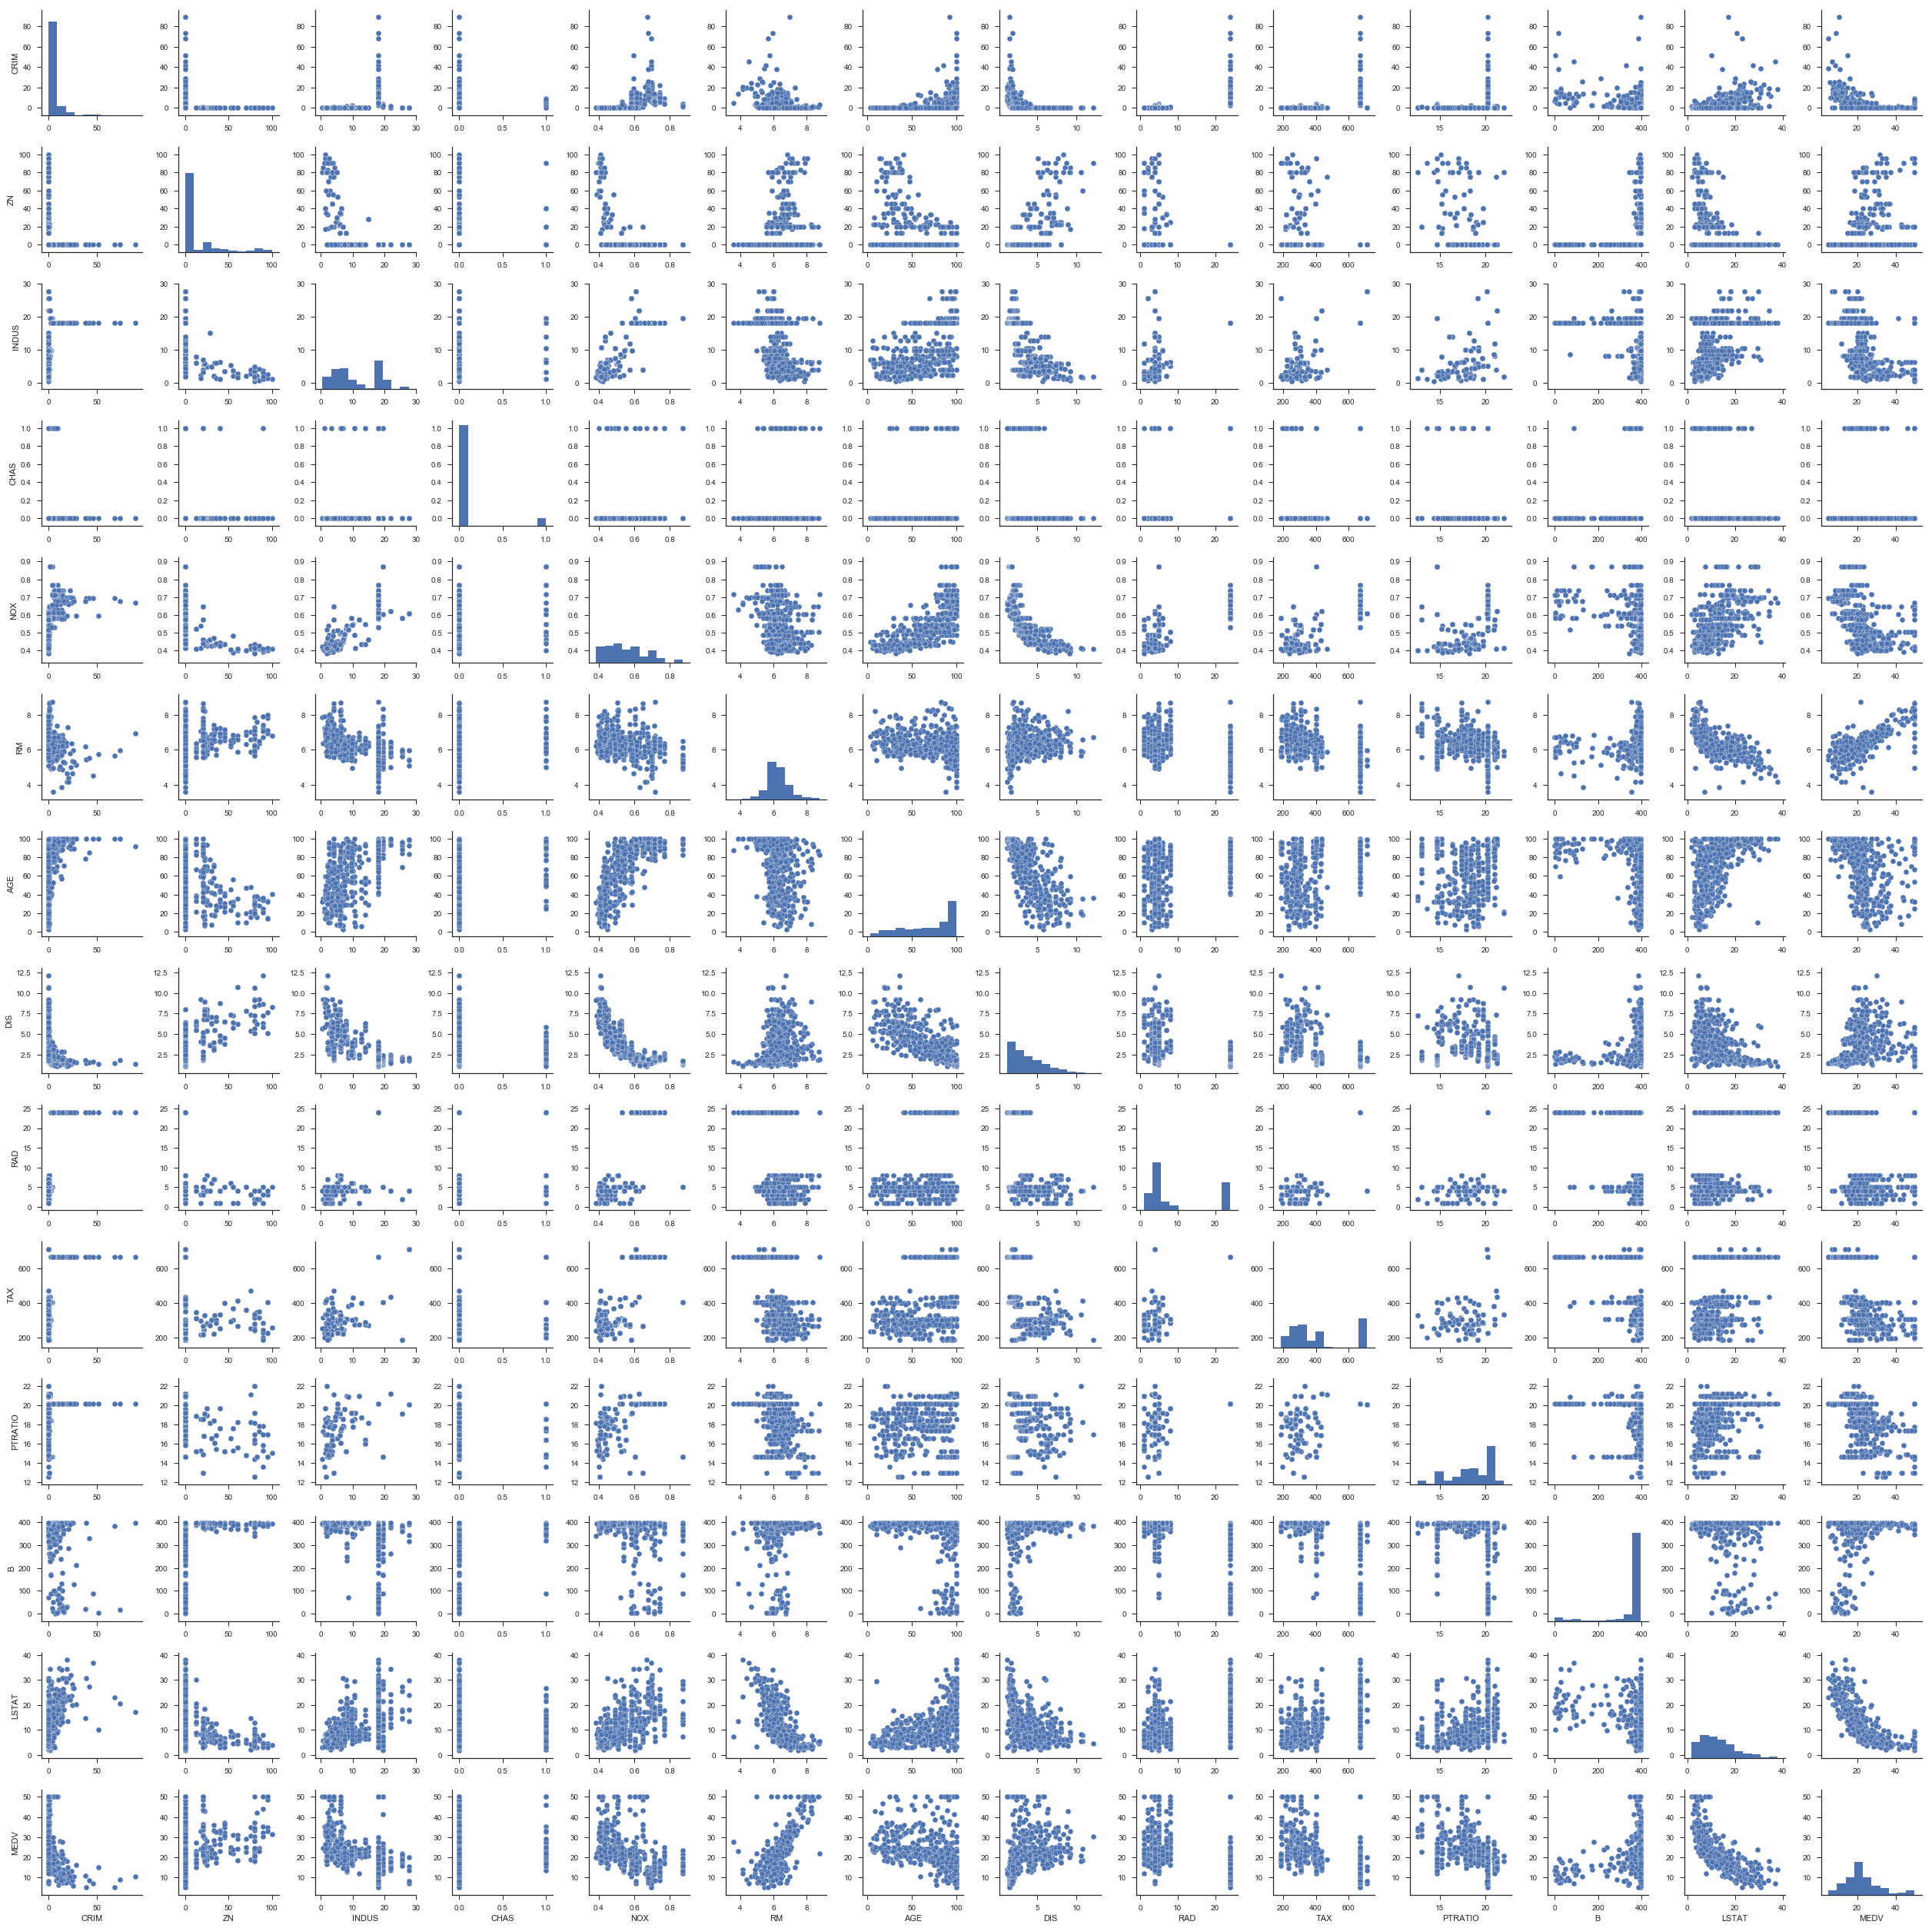

In [3]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

In [4]:
# Нормальное распределение: RM, MEDV
# Экспоненциальное распределение: DIS
# Распределение Бернулли: CHAS

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [5]:
value = data['MEDV']
status = data['LSTAT']
value = np.array(value).reshape(-1,1)
status = np.array(status).reshape(-1,1)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    value,
    status,
    test_size = 0.2,
    random_state = 3
)

In [8]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
predicted_y = model.predict(X_test)

In [10]:
model.score(X_test, y_test)

0.5663680841829948

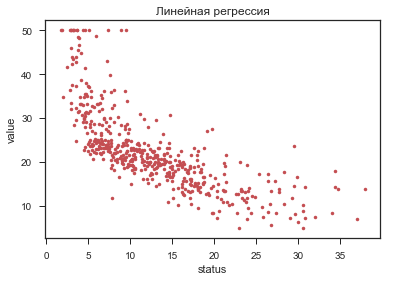

In [11]:
plt.xlabel('status')
plt.ylabel('value')
plt.title('Линейная регрессия')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(status, value, 'r.')
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [12]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [13]:
X = data.iloc[:,2:]
X.head()

,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [14]:
np.cov(X)

array([[ 293.5       ,  109.875     ,   35.        , ...,  188.375     ,
         -63.5       , -145.875     ],
       [ 109.875     ,   83.25      ,   57.125     , ...,    3.75      ,
          13.75      ,   48.5       ],
       [  35.        ,   57.125     ,   63.94444444, ...,   10.52777778,
          25.95833333,   23.81944444],
       ...,
       [ 188.375     ,    3.75      ,   10.52777778, ..., 1594.86111111,
         278.70833333,  -82.72222222],
       [ -63.5       ,   13.75      ,   25.95833333, ...,  278.70833333,
         276.5       ,  351.95833333],
       [-145.875     ,   48.5       ,   23.81944444, ...,  -82.72222222,
         351.95833333, 1062.94444444]])

In [15]:
np.round_(np.cov(X), decimals=2)

array([[ 293.5 ,  109.88,   35.  , ...,  188.38,  -63.5 , -145.88],
       [ 109.88,   83.25,   57.12, ...,    3.75,   13.75,   48.5 ],
       [  35.  ,   57.12,   63.94, ...,   10.53,   25.96,   23.82],
       ...,
       [ 188.38,    3.75,   10.53, ..., 1594.86,  278.71,  -82.72],
       [ -63.5 ,   13.75,   25.96, ...,  278.71,  276.5 ,  351.96],
       [-145.88,   48.5 ,   23.82, ...,  -82.72,  351.96, 1062.94]])

In [16]:
print(np.shape(np.cov(X)))

(156, 156)


In [17]:
np_transp = np.round_(np.cov(X.T), decimals=2)
print(np.shape(np_transp))

(9, 9)


In [18]:
X.isnull().sum()

SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [19]:
data['Country (region)'].isnull().sum()

0

In [20]:
len(data['Country (region)'])

156

In [21]:
names = data['Country (region)'].unique()

In [22]:
url='https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv'
s=requests.get(url).content
countries=pd.read_csv(io.StringIO(s.decode('utf-8')))
countries.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [23]:
countries['First'] = countries['Country_Name'].apply(lambda x: x.replace(',','').split()[0])

In [24]:
data['First'] = data['Country (region)'].apply(lambda x: x.replace(',','').split()[0])

In [25]:
mapping = dict(countries[['First', 'Continent_Name']].values)
data['Continent'] = data['First'].map(mapping)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy,First,Continent
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Finland,Europe
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Denmark,Europe
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Norway,Europe
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Iceland,Europe
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Netherlands,North America


In [26]:
data.dropna(how='any', inplace = True)

In [27]:
data.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,78.903704,78.259259,78.681481,79.185185,77.296296,79.185185,75.651852,79.014815,78.622222,74.311111
std,46.441726,46.489441,44.631100,43.857841,46.031961,45.440167,42.483064,45.089957,43.719402,44.165643
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,39.500000,38.500000,40.500000,41.500000,35.500000,40.500000,41.000000,42.500000,40.500000,35.500000
50%,79.000000,78.000000,78.000000,78.000000,78.000000,80.000000,77.000000,79.000000,78.000000,75.000000
75%,120.500000,119.500000,117.500000,116.500000,117.500000,119.500000,111.500000,118.000000,116.500000,113.500000
max,156.000000,156.000000,154.000000,154.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


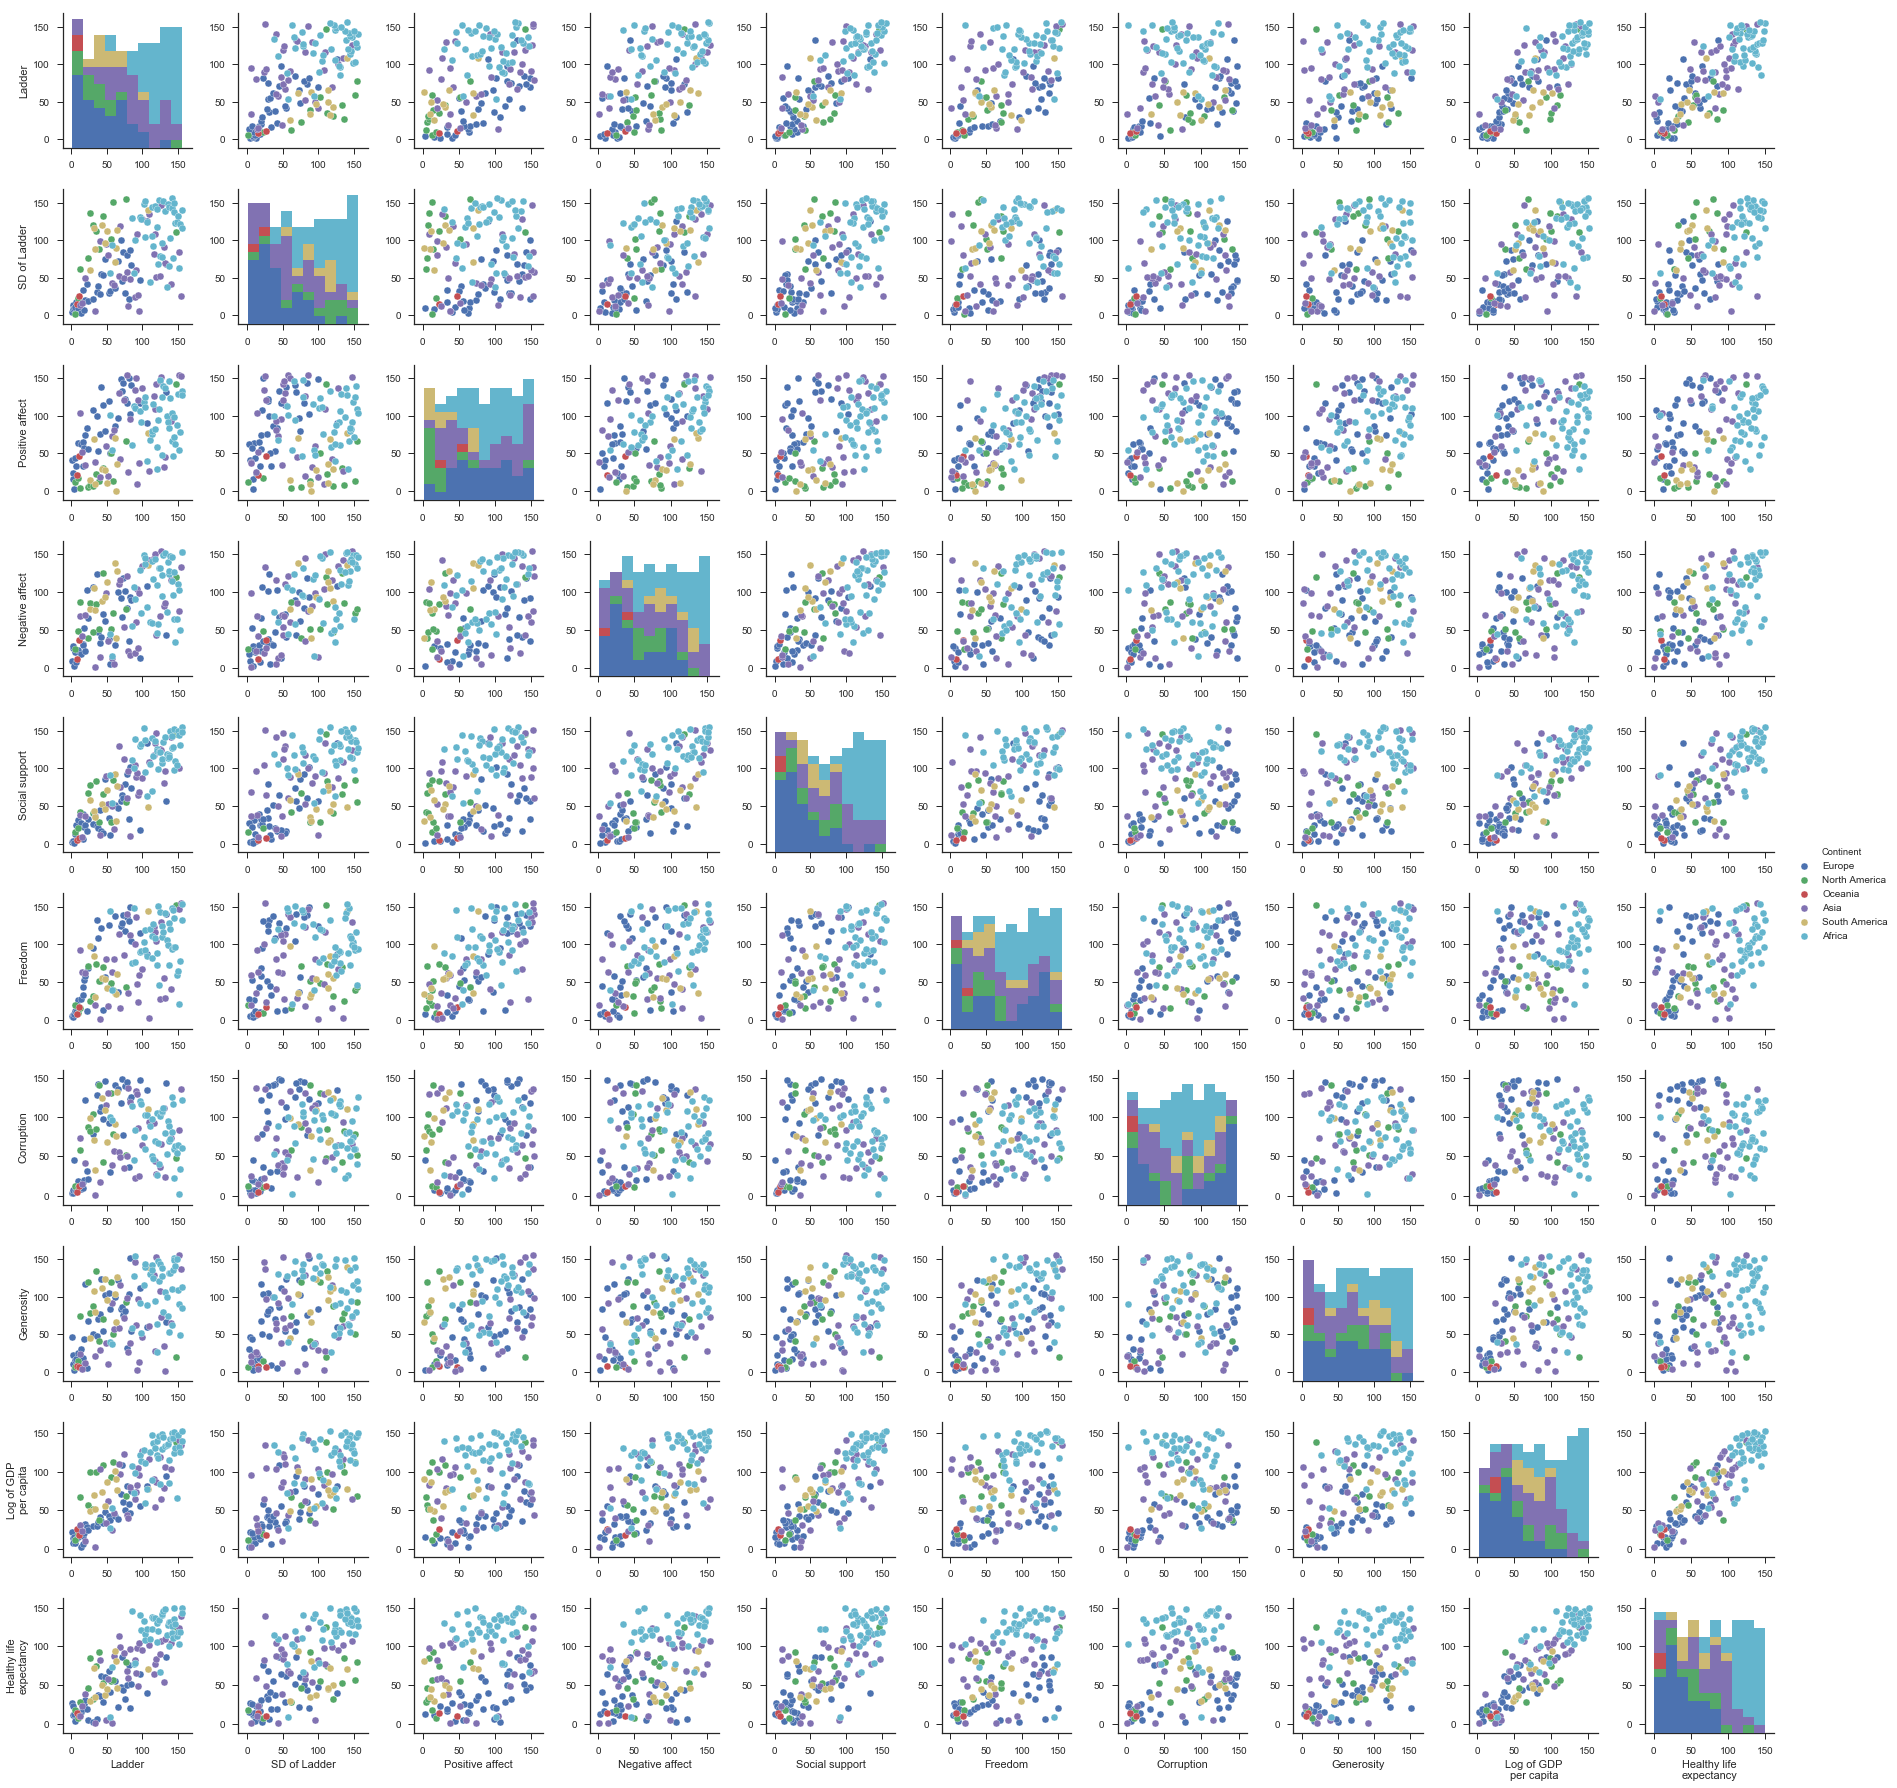

In [29]:
g = sns.pairplot(data, hue = 'Continent')

In [30]:
# Разделение по континентам не везде правильное, поскольку в нескольких случаях подтянулось только первое слово.
# Тем не менее, можно заметить разницу между Европой и Северной Америкой, с одной стороны, и Азией, Африкой и Южной 
# Америкой, с другой

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

Сколько стран в выборке? Написать ответ. 

Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

In [31]:
ladder = data['Ladder']
generosity = data['Generosity']

/Users/svetlana/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


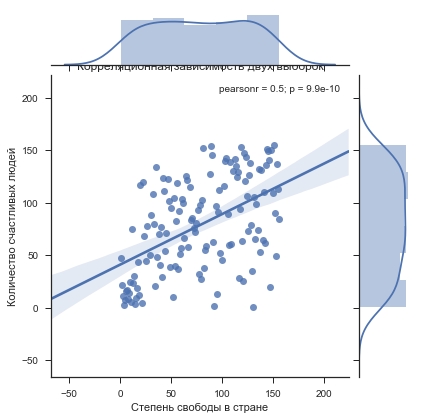

In [36]:
sns.jointplot(x=ladder, y=generosity,data=data, kind='reg')
plt.xlabel('Степень свободы в стране')
plt.ylabel('Количество счастливых людей')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

In [37]:
#р < 0.05 -> делаем вывод о статистически значимой положительной коррреляции (к-т Пирсона = 0.5)

In [45]:
import numpy.linalg as la
import math
Y = np.vstack((ladder, generosity)).T

In [46]:
w, v = la.eig(np.cov(Y.T))

Собственное значение:  3134.63 Собственный вектор:  [0.72784085 0.68574608]


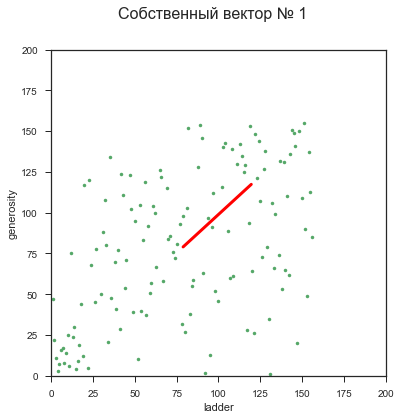

Собственное значение:  1055.3 Собственный вектор:  [-0.68574608  0.72784085]


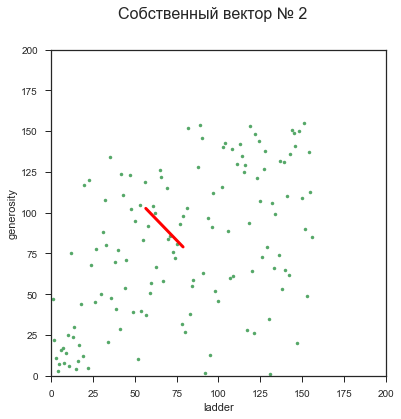

In [47]:
for i in range(len(w)):
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(ladder, generosity, 'g.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('ladder')
    plt.xlim(0,200)
    plt.ylabel('generosity')
    plt.ylim(0,200)
    plt.plot([ladder.mean(), ladder.mean() + math.sqrt(w[i]) * v[:,i][0]], 
             [generosity.mean(), generosity.mean() + math.sqrt(w[i]) * v[:,i][1]],color='red', linewidth=3)
    plt.show()

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

/Users/svetlana/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


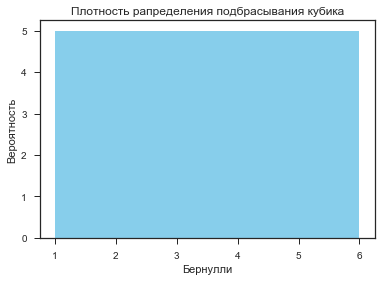

In [48]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 7, size=10)
ax= sns.distplot(coin_flips,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения подбрасывания кубика')
plt.show()
heads = np.sum(coin_flips)

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

/Users/svetlana/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


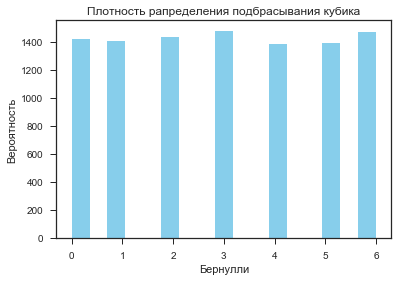

In [49]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 7, size=10000)
ax= sns.distplot(coin_flips,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения подбрасывания кубика')
plt.show()
heads = np.sum(coin_flips)